
Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очень качественную работу - видно, что приложено много усилий,
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

Инициализируем библиотеки:

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>

Прочитаем и рассмотрим датасет:

In [2]:
df = pd.read_csv("autos.csv")
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [5]:
print(f"Дубликаты: {df.duplicated().sum()}")

Дубликаты: 4


In [6]:
print(f"Количество NaN:\n {df.isnull().sum()}")

Количество NaN:
 DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


Можно сделать вывод:

- Названия столбцов нужно привести к змеиному
- Некоторые столбцы сделует удалить из-за неинформативности.
- Заполнение пропусков и изменение типов данных 
- Некоторые минимальные и максимальные значения аномальны

<div class="alert alert-block alert-success">
<b>Успех:</b> Первичный осмотр есть
</div>

### Переименование столбцов

In [7]:
display(df.columns)
df.set_axis(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gear_box','power', 'model', 
             'kilometer', 'registration_month', 'fuel_type', 'brand','repaired', 'date_created', 
             'number_of_pictures', 'postal_code', 'last_seen'],axis='columns' ,inplace=True)
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year',
       'gear_box', 'power', 'model', 'kilometer', 'registration_month',
       'fuel_type', 'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

### Удаление дубликатов

In [8]:
df = df.drop_duplicates()
print('Дубликаты:', df.duplicated().sum())

Дубликаты: 0


### Удаление неинформатинвых признаков

Рассмотрим неинформативные столбцы:
- Дата скачивания анкеты, создания анкеты и последней активности пользователя - бесполезная аналитическая ифнормация веб-сайта
- Месяц регистрации - не влияет на стомость, так как важен год. 
- Количество фотографий - все значения нулевые.
- Почтовый индекс владельца - не относится к качеству машины.

In [9]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'])
df_backup = df.copy()

df.drop(['date_crawled', 'registration_month', 'date_created', 'number_of_pictures', 
         'postal_code', 'last_seen'], axis=1, inplace=True)
df.columns

Index(['price', 'vehicle_type', 'registration_year', 'gear_box', 'power',
       'model', 'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение.
</div>

### Изменение типа данных

In [10]:
display(df.describe())
df.info()

,price,registration_year,power,kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354365 non-null  int64 
 1   vehicle_type       316875 non-null  object
 2   registration_year  354365 non-null  int64 
 3   gear_box           334532 non-null  object
 4   power              354365 non-null  int64 
 5   model              334660 non-null  object
 6   kilometer          354365 non-null  int64 
 7   fuel_type          321470 non-null  object
 8   brand              354365 non-null  object
 9   repaired           283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


Некоторые столбцы имеет слишком длинный(64 бита) тип данных, его можно уменьшить для сокращения размера данных.

Для `price` `registration_year` `power` - int16 - до 30 тысяч.

Для большого значения километража - int32

In [11]:
df['price'] = df['price'].astype("int16")
df['registration_year'] = df['registration_year'].astype("int16")
df['power'] = df['power'].astype("int16")
df['kilometer'] = df['kilometer'].astype("int32")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354365 non-null  int16 
 1   vehicle_type       316875 non-null  object
 2   registration_year  354365 non-null  int16 
 3   gear_box           334532 non-null  object
 4   power              354365 non-null  int16 
 5   model              334660 non-null  object
 6   kilometer          354365 non-null  int32 
 7   fuel_type          321470 non-null  object
 8   brand              354365 non-null  object
 9   repaired           283211 non-null  object
dtypes: int16(3), int32(1), object(6)
memory usage: 22.3+ MB


### Заполнение пропусков

Есть пропуски в столбцах: `vehicle_type gear_box model fuel_type repaired` заменим их на категорию **unknown**

In [12]:
def fill_unkwn(df, features):
    df[f'{features}'].fillna('unknown', inplace=True)
    display(df[f'{features}'].value_counts().head(10))

In [13]:
display(df['gear_box'].value_counts())
fill_unkwn(df,'gear_box')

manual    268249
auto       66283
Name: gear_box, dtype: int64

manual     268249
auto        66283
unknown     19833
Name: gear_box, dtype: int64

In [14]:
display(df['model'].value_counts().head(10))
fill_unkwn(df,'model')

golf        29232
other       24420
3er         19761
polo        13066
corsa       12570
astra       10809
passat      10145
a4           9900
c_klasse     8312
5er          7868
Name: model, dtype: int64

golf        29232
other       24420
3er         19761
unknown     19705
polo        13066
corsa       12570
astra       10809
passat      10145
a4           9900
c_klasse     8312
Name: model, dtype: int64

In [15]:
display(df['vehicle_type'].value_counts())
fill_unkwn(df,'vehicle_type')

sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: vehicle_type, dtype: int64

sedan          91457
small          79830
wagon          65165
unknown        37490
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: vehicle_type, dtype: int64

In [16]:
df['fuel_type'].value_counts()

petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

Мы можем понять что ``Petrol and Gasoline``- это один тип топлива.

In [17]:
df['fuel_type'] = np.where(df['fuel_type'] == 'petrol','gasoline',df['fuel_type'])
fill_unkwn(df,'fuel_type')

gasoline    315068
unknown      32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

In [18]:
display(df['repaired'].value_counts())
fill_unkwn(df,'repaired')

no     247158
yes     36053
Name: repaired, dtype: int64

no         247158
unknown     71154
yes         36053
Name: repaired, dtype: int64

Проверим остались ли пропуски:

In [19]:
df.isnull().sum()

price                0
vehicle_type         0
registration_year    0
gear_box             0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64

Все отлично, данные отчистили.

<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски обработаны хорошим образом
</div>


### Аномалии

Рассмотрим все возможные значения признаков:

In [20]:
df.describe()

,price,registration_year,power,kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Напишем функцию для вывода двух графиков

In [21]:
def plot(param,bins,x,y,title,xlim1,xlim2):
    plt.figure(figsize=(10,5))
    ax = sb.boxplot(x=param)
    ax.set(xlabel= x, title= title,xlim=xlim1)
    plt.show()
    plt.figure(figsize=(10,5))
    ax = sb.distplot(param, kde=False, bins=bins)
    ax.set(xlabel=x, ylabel=y, title=title,xlim=xlim2)

<div class="alert alert-block alert-info">
<b>Совет:</b> 

 Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>

#### Цены

Рассмотрим цены автомобилей на графиках

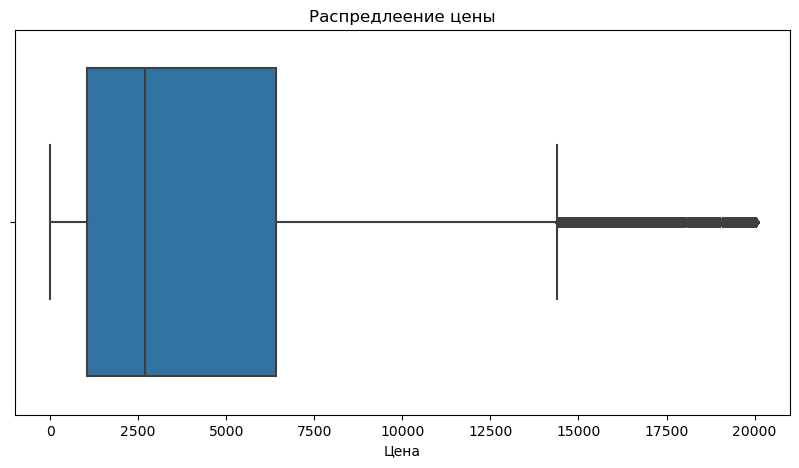

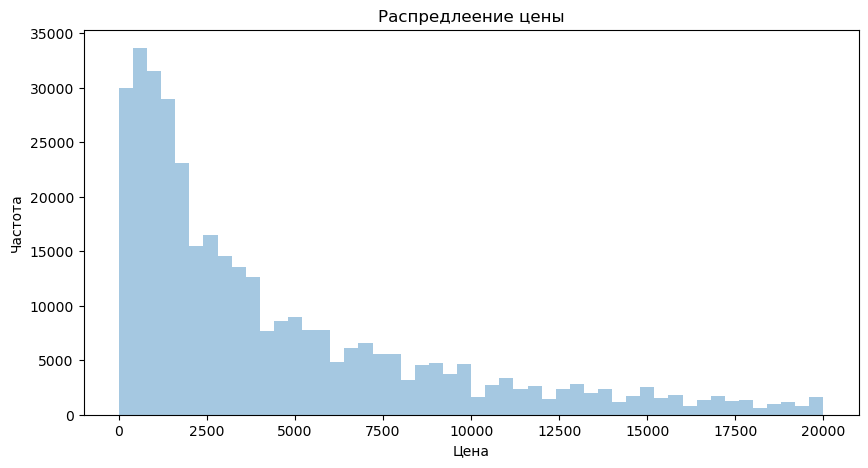

In [22]:
plot(df['price'],50,"Цена","Частота",'Распредлеение цены',(None),(None))

По графику заметно, что есть нулевые значения цены, чего быть не может, хотя я бы купил машину за 0 рублей. Рассмотрим количество нулевых значений:

In [23]:
print(f"Количество нулевых значений: {df.query('price == 0')['price'].count()}")

Количество нулевых значений: 10772


Удалим эти данные, так как они бесполезны для предсказания цен автомобилей

In [24]:
df_clear = df.query('price != 0')
print(f"Количество нулевых значений: {df_clear.query('price == 0')['price'].count()}")

Количество нулевых значений: 0


<div class="alert alert-block alert-success">
<b>Успех:</b>  А около-нулевые цены, не кажется подозрительными? Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>

#### Пробег

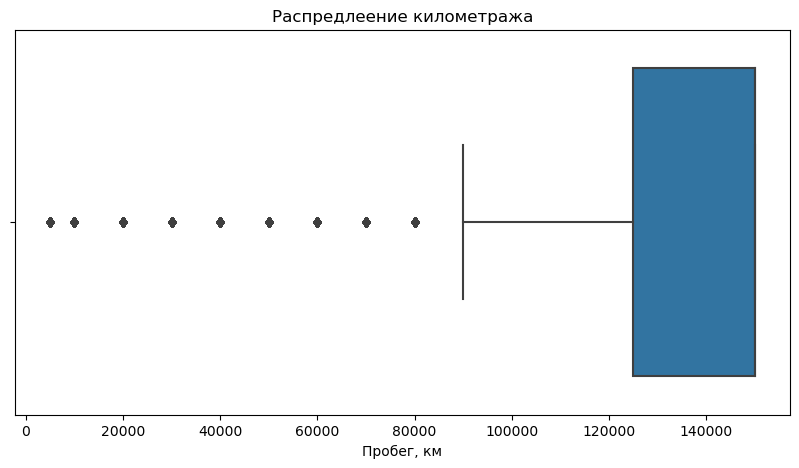

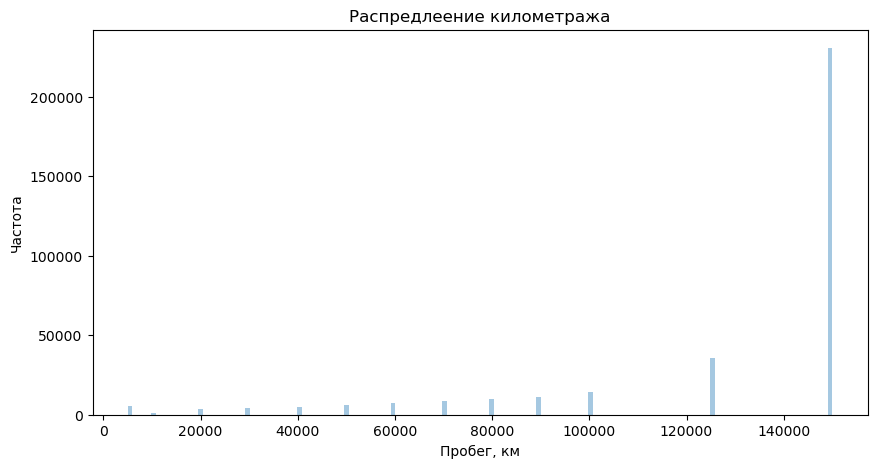

In [25]:
plot(df_clear['kilometer'],150,"Пробег, км","Частота",'Распредлеение километража',xlim1= (None),xlim2=(None))

По графикам можно сказать что все нормально с данными о пробеге. 

####  Год регистрации

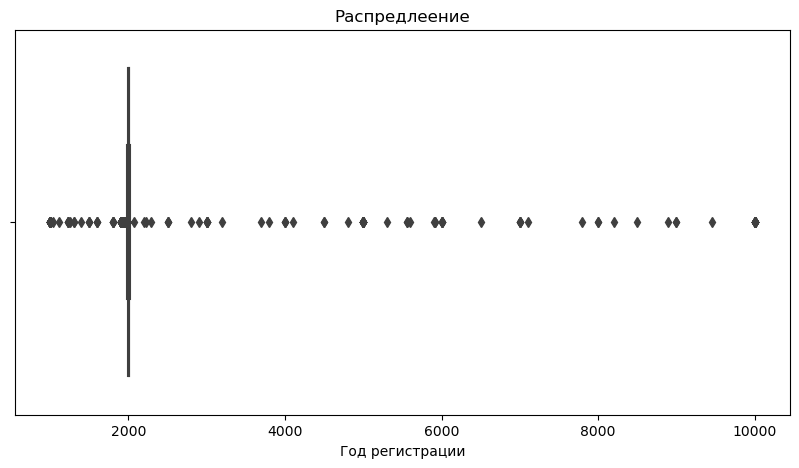

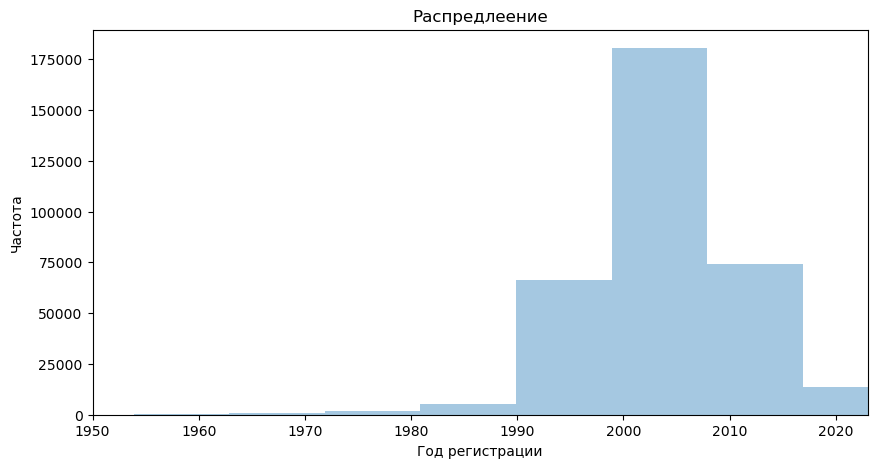

In [26]:
plot(df_clear['registration_year'],1000,"Год регистрации","Частота",'Распредлеение',(None),(1950, 2023))

Машины не могут быть заргестрированы раньше, чем 2016 год, так как из датасета можно узнать, что анкеты загружались `только в 2016 году`. 

Также машины старше 1960 года скорее всего уже не продают, это могут быть уже продажи на выстовках.

Рассмотрим сколько анкет лежат между 1960 и 2023 годом:

In [27]:
df_backup["date_crawled"].sort_values(ascending = False)

90713    2016-04-07 14:36:58
339649   2016-04-07 14:36:56
301030   2016-04-07 14:36:55
53739    2016-04-07 14:36:54
204218   2016-04-07 14:36:53
                 ...        
324763   2016-03-05 14:06:24
176823   2016-03-05 14:06:24
99885    2016-03-05 14:06:24
220583   2016-03-05 14:06:23
329497   2016-03-05 14:06:22
Name: date_crawled, Length: 354365, dtype: datetime64[ns]

In [28]:
print(f"Количество анкет: {df_clear.query('registration_year >= 2016 or registration_year <= 1960')['registration_year'].count()}")

Количество анкет: 23223


Удалим линшнее, так как оно маловероятно. 

In [29]:
df_clear = df_clear.query('registration_year >= 1960 and registration_year <= 2016')


<div class="alert alert-block alert-info">
<b>Совет:</b> Советую посмотреть на дату выгрузки анкет - там тоже можно увидеть полезную информацию по поводу границ года регистраци.
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Время выгрузки анкет рассмотрено, в данном случае актуальный год - 2016
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были изменены границы рассматриваемого интервала лет.
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

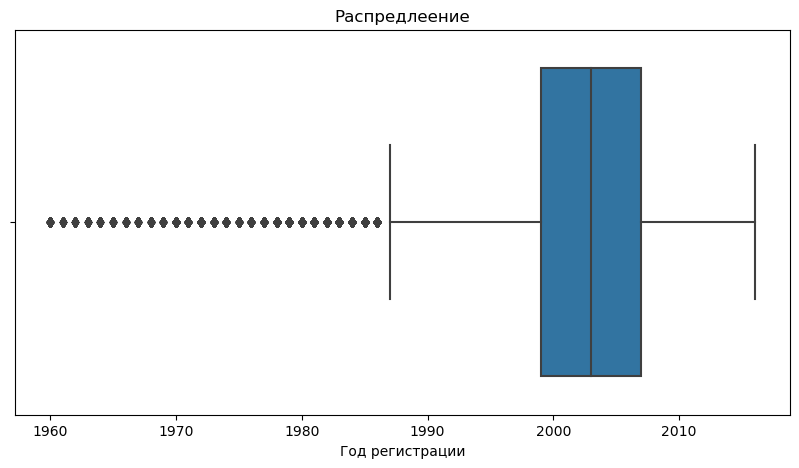

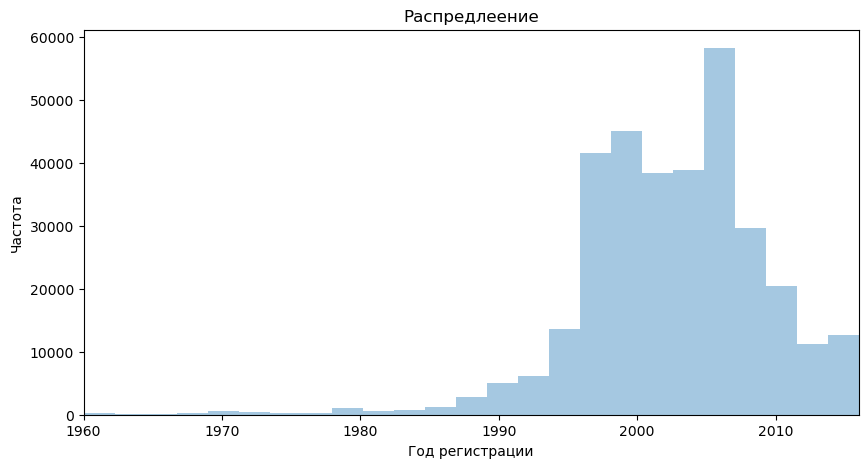

In [30]:
plot(df_clear['registration_year'],25,"Год регистрации","Частота",'Распредлеение',(None),(1960, 2016))


На данный момент распредление выглядит лучше, а выбросов стало меньше. 

#### Мощность автомобиля

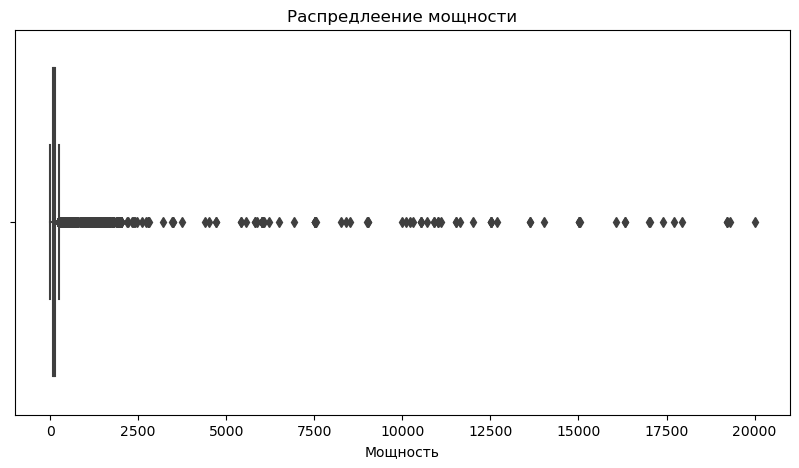

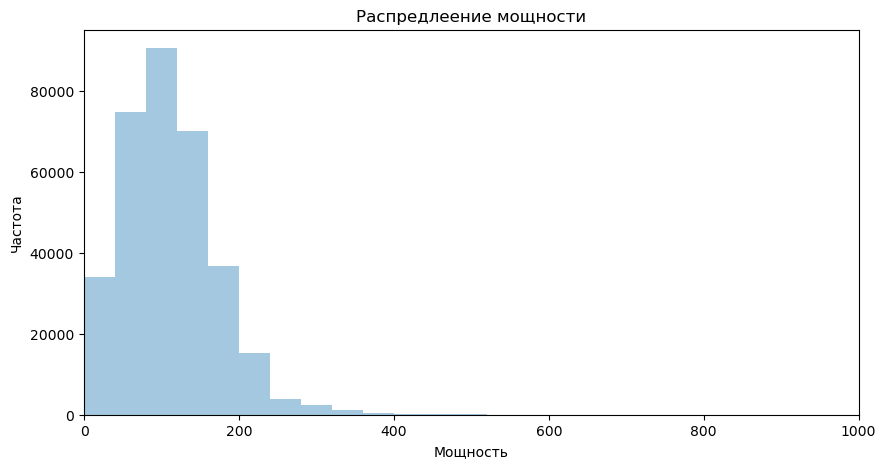

In [31]:
plot(df_clear['power'],500,"Мощность","Частота",'Распредлеение мощности',xlim1= (None),xlim2=(-1,1000))

Рассмотрим околонулевые значения, на данный момент есть старые машины у которых минимальное количество л.с, например Subaru 360 равняется 18 л.с.

А в то же вермя абсолютное большинство это 1000 л.с. - например у Феррари.

Будем считать как адекватные все значения, которые больше 18.

<div class="alert alert-block alert-info">
<b>Совет:</b>  Вопрос на подумать: Как думаешь а машины с 0-ой мощностью могут быть просто без двигателя?
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Мне кажется в анкете указывают характеристики оригинальной модели, иначе полезно было бы добавить признак оригинальности автомобиля, сообщающий о том внесены ли изменения в изначальную комплектацию. Например, остутствие двигателя было бы тюнингом)) 
    
Иначе становится непонятно ошибся клиент или нет.
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Согласен)
</div>

In [32]:
nul = (df_clear.query('power == 0')["power"].count())
print('Нулевая мощность:', nul)
non_real = (df_clear.query('power > 1000')["power"].count())
print('Мощность больше тысячи л.с.:', non_real)

Нулевая мощность: 32731
Мощность больше тысячи л.с.: 261


Уберем аномальные значения:

In [33]:
df_clear.loc[(df_clear['power'] > 1000), 'power'] = 0
df_clear.loc[(df_clear['power'] <= 18), 'power'] = 0
df_clear['power'].replace(0, np.nan, inplace=True)
print(f"Количество пропусков: {df_clear['power'].isna().sum()}")

Количество пропусков: 33350


Сгруппируем данные по всем характеристикам автомобилей и возьмем медиану каждой отдельной марке автомобиля для заполнения пропусков такой же марки:

In [34]:
for_fill = df_clear.groupby(['brand', 'model', 'fuel_type', 'gear_box','registration_year', 'vehicle_type'])['power']\
           .transform('median')
df_clear['power'].fillna(for_fill, inplace=True)

In [35]:
display(df_clear['power'].isna().sum())
df_clear.dropna(inplace=True)
print(df_clear['power'].dtypes)
df_clear['power'] = df_clear['power'].astype("int16")

7861

float64


Переведем из float в int после заполнения пропусков, так как медиана считала числа с плавющей точкой.

In [36]:
print(f"Количество NaN в столбце 'power': {df_clear['power'].isna().sum()}")

Количество NaN в столбце 'power': 0


Здачи этой главы были **выполнены**: столбцы переименованы, удалены неинформативные признаки, пропуски и аномалии обработаны.


<div class="alert alert-block alert-success">
<b>Успех:</b> В целом хорошая, детальная предобработка - идем дальше
</div>

## Обучение моделей

Подготовим данные для обучения, для этого:
- Закодируем категориальные данные
- Разделим данные на выборки
- Отмаштабируем данные

In [37]:
df_OE = df_clear.copy()
df_OHE = df_clear.copy()


<div class="alert alert-block alert-danger">
    

<b>Ошибка:</b> OE - хороший выбор для всех моделей, кроме линейных, они не могут корректно обрабатывать номинальные данные обработанные порядковым способом. Для них хорош OHE, но тот же OHE нельзя применять для всех других моделей здесь (потому что не эффективно, с точки зрения времени)
  

Я тебе могу предложить, что можно сделать:
    
- Сделать 1 набор данных: 
    - Закодировать для всех моделей методом TargetEncoder, BinaryEncoder - вполне универсальные варианты
    - Закодировать все признаки методом OHE, а модель машины методом OE
    - Убрать использование линейных моделей (так как их рассмотрение не обязательно) и использовать единственный метод кодировки OE.
- Сделать 2 набора данных
    - Закодировать для линейных моделей методом OHE, для остальных OE (или внутренний метод кодирования данных)
    
P.S. Отмечу, что encoder правильно применять после разбиения данных и обучать только на обучающей выборке, для остальных выборок просто использовать transform. Примеры использования с объяснениями можно найти посмотреь https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing
  
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Понял, тогда следует рассмотреть отдельные выборки  для линейных и других моделей.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены некоторые изменения:
    
- Encoder используется после разбиения на выборки.
- Для разных моделей используется разный тип кодирования
- Добавлены функции для повторяющихся действий. 

</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Принял, пойдем смотреть
</div>

Разобьем на признаки и таргет:

In [38]:
def separate_set(df):
    target = df['price']
    features = df.drop('price', axis=1)
    
    features_train, features_check,target_train,target_check = \
    train_test_split(features, target, test_size=0.4, random_state=12345)
    
    features_test, features_valid, target_test, target_valid = \
    train_test_split(features_check, target_check, test_size=0.5,random_state=12345)
    
    return features_train, features_valid, features_test, target_train, target_valid, target_test

In [39]:
features_train, features_valid, features_test, target_train, target_valid, target_test = separate_set(df_clear)
features_train_OE, features_valid_OE, features_test_OE, target_train_OE, target_valid_OE, target_test_OE = separate_set(df_OE) 

Разделение на выборки для OHE произведем после кодирования, чтобы количество столбцов было одинаково так как некоторые категории можно потерять 

Проверим правильность разделения выборки:

In [40]:
full = (features_train_OE.shape[0]+features_test_OE.shape[0]+features_valid_OE.shape[0])
print(f"Процент обучающей выборки: {(features_train_OE.shape[0]*100/full):.2f}")
print(f"Процент тестовой выборки: {(features_test_OE.shape[0]*100/full):.2f}")
print(f"Процент валидационной выборки: {(features_valid_OE.shape[0]*100/full):.2f}")

Процент обучающей выборки: 60.00
Процент тестовой выборки: 20.00
Процент валидационной выборки: 20.00


Выполним OE and OHE кодирование

In [41]:
categori = ['vehicle_type', 'gear_box', 'model', 'fuel_type', 'brand', 'repaired']
encoder = OrdinalEncoder()
encoder.fit(features_train[categori])
features_train_OE[categori] = encoder.transform(features_train_OE[categori])
features_valid_OE[categori] = encoder.transform(features_valid_OE[categori])
features_test_OE[categori] = encoder.transform(features_test_OE[categori])

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

In [42]:
def OHE_transform(df,categori):
    df_OHE_done = pd.get_dummies(df[categori])
    return df.drop(categori , axis = 1).join(df_OHE_done)


<div class="alert alert-block alert-info">
    
<b>Совет[2]:</b> Также как аналог pd.get_dummies хочу посоветовать обратить внимание на OneHotEncoder от sklearn (это более сложный и продвинутый инструмент). Здесь можно посмотреть примеры https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing
</div>

In [43]:
df_OHE = OHE_transform(df_OHE,categori)
features_train_OHE, features_valid_OHE, features_test_OHE, target_train_OHE, target_valid_OHE, target_test_OHE = separate_set(df_OHE)

Произведено два типа кодирования:
- OHE - для линейный моделей
- OE - для остальных моделей

Маштабируем данные:

In [44]:
num = ['registration_year', 'power', 'kilometer']
scaler = StandardScaler()
scaler.fit(features_train_OE[num])
features_train_OE[num] = scaler.transform(features_train_OE[num])
features_test_OE[num] = scaler.transform(features_test_OE[num])
features_valid_OE[num] = scaler.transform(features_valid_OE[num])
scaler.fit(features_train_OHE[num])
features_train_OHE[num] = scaler.transform(features_train_OHE[num])
features_test_OHE[num] = scaler.transform(features_test_OHE[num])
features_valid_OHE[num] = scaler.transform(features_valid_OHE[num])

display(features_train_OE[num])

,registration_year,power,kilometer
175323,0.809682,-0.265543,0.578444
28405,1.425930,-0.615443,-2.403822
321823,-0.268752,-1.094253,0.578444
330080,-0.576877,-0.062970,0.578444
227841,0.193434,-0.062970,0.578444
...,...,...,...
175023,0.501558,0.802571,0.578444
52810,0.963744,-0.191880,0.578444
95156,0.501558,-0.468117,-1.861592
85118,0.039372,-0.431285,-0.099344


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler обучен только на трейне
</div>


### Обучение линейной регрессии

In [45]:
%%time 
LR = LinearRegression()
LR.fit(features_train_OHE, target_train_OHE)
predictions = LR.predict(features_valid_OHE)
print(np.sqrt(mean_squared_error(target_valid_OHE, predictions)))

2603.2848035313586
Wall time: 1.44 s


### Обучение LGBM

In [46]:
%%time 
h_rmse = 10000
h_depth = 0
h_est = 0
depth = 0
est = 0
for depth in range(5, 20, 4):
    for est in range(50, 120, 10):
        LGBMR = LGBMRegressor(max_depth=depth, n_estimators=est, random_state=12345)
        LGBMR.fit(features_train_OE, target_train_OE)
        predictions = LGBMR.predict(features_valid_OE)
            
        rmse = np.sqrt(mean_squared_error(target_valid_OE, predictions))
       
        print('Depth =', depth, 'Estimators =', est, 'RMSE =', rmse)
        
        if (h_rmse  > rmse):
            h_rmse = rmse
            h_est = est
            h_depth = depth
            
print('Best Depth =', h_depth, 'Best Estimators =', h_est, 'Best RMSE =', h_rmse)
 

Depth = 5 Estimators = 50 RMSE = 1831.9015268613866
Depth = 5 Estimators = 60 RMSE = 1796.115670390643
Depth = 5 Estimators = 70 RMSE = 1772.8160273850065
Depth = 5 Estimators = 80 RMSE = 1760.6882784804054
Depth = 5 Estimators = 90 RMSE = 1749.8449303561458
Depth = 5 Estimators = 100 RMSE = 1738.967405659127
Depth = 5 Estimators = 110 RMSE = 1732.237225090232
Depth = 9 Estimators = 50 RMSE = 1770.7871794970072
Depth = 9 Estimators = 60 RMSE = 1743.8019217456742
Depth = 9 Estimators = 70 RMSE = 1726.6634237317296
Depth = 9 Estimators = 80 RMSE = 1713.7203865445958
Depth = 9 Estimators = 90 RMSE = 1703.6383250718907
Depth = 9 Estimators = 100 RMSE = 1693.0272552504618
Depth = 9 Estimators = 110 RMSE = 1684.0187305697436
Depth = 13 Estimators = 50 RMSE = 1771.4227106893497
Depth = 13 Estimators = 60 RMSE = 1745.837100766427
Depth = 13 Estimators = 70 RMSE = 1724.7015668346312
Depth = 13 Estimators = 80 RMSE = 1711.8400157752235
Depth = 13 Estimators = 90 RMSE = 1700.4622077869547
Depth =

Рассмотрим отдельно и рассчитаем время обучения, предсказания и метрику RMSE на лучших гиперпараметрах:

In [47]:
%%time
LGBMR = LGBMRegressor(max_depth=13, n_estimators=110, random_state=12345)
LGBMR.fit(features_train_OE, target_train_OE)
print("Время обучения LGBM:")

Время обучения LGBM:
Wall time: 361 ms


In [48]:
%%time
predictions = LGBMR.predict(features_valid_OE)

rmse = np.sqrt(mean_squared_error(target_valid_OE, predictions))

print('Best depth = ', 13, 'Best estimators = ' , 110, 'RMSE = ', rmse)
print("Время предсказания LGBM:")

Best depth =  13 Best estimators =  110 RMSE =  1682.4818404959258
Время предсказания LGBM:
Wall time: 44 ms


Лучший результат для LightGBM: `Depth = 13` `Best Estimators = 110` при значениях `RMSE = 1682.48`.

Также при выбранных параметрах: 
- Время обучения : 361 ms
- Время предсказания : 44 ms

### Обучение CatBoost

In [49]:
%%time
h_rmse = 10000
h_depth = 0
h_iteration = 0

for depth in range(5, 16, 3):
    for iteration in range(50, 120, 10):
        CBR = CatBoostRegressor(depth=depth, iterations=iteration, random_state=12345)
        CBR.fit(features_train_OE, target_train_OE)
        predictions = CBR.predict(features_valid_OE)
            
        rmse = np.sqrt(mean_squared_error(target_valid_OE, predictions))
        
        print('Depth =', depth, 'Iteration =' , iteration, 'RMSE =', rmse)

        if (h_rmse > rmse):
            h_rmse = rmse
            h_iteration = iteration
            h_depth = depth
            
print('Best depth', h_depth, 'Best iteration', h_iteration, 'Best RMSE:', h_rmse)

Learning rate set to 0.5
0:	learn: 3322.8924155	total: 138ms	remaining: 6.74s
1:	learn: 2704.7172971	total: 146ms	remaining: 3.5s
2:	learn: 2452.9893586	total: 154ms	remaining: 2.42s
3:	learn: 2305.0293499	total: 162ms	remaining: 1.86s
4:	learn: 2227.5695187	total: 169ms	remaining: 1.52s
5:	learn: 2161.8741898	total: 178ms	remaining: 1.3s
6:	learn: 2119.2051375	total: 185ms	remaining: 1.14s
7:	learn: 2089.6020046	total: 194ms	remaining: 1.02s
8:	learn: 2056.4428118	total: 203ms	remaining: 926ms
9:	learn: 2034.4397557	total: 211ms	remaining: 846ms
10:	learn: 2019.9519088	total: 219ms	remaining: 777ms
11:	learn: 1991.2163853	total: 227ms	remaining: 720ms
12:	learn: 1970.2490076	total: 236ms	remaining: 670ms
13:	learn: 1961.6615122	total: 243ms	remaining: 625ms
14:	learn: 1949.0162409	total: 251ms	remaining: 585ms
15:	learn: 1928.3563179	total: 259ms	remaining: 551ms
16:	learn: 1912.9727842	total: 268ms	remaining: 520ms
17:	learn: 1901.4197105	total: 276ms	remaining: 491ms
18:	learn: 1892

39:	learn: 1781.2758442	total: 330ms	remaining: 248ms
40:	learn: 1779.0828460	total: 339ms	remaining: 240ms
41:	learn: 1774.9958735	total: 348ms	remaining: 232ms
42:	learn: 1771.2165171	total: 356ms	remaining: 224ms
43:	learn: 1766.9268459	total: 366ms	remaining: 216ms
44:	learn: 1763.5226668	total: 374ms	remaining: 208ms
45:	learn: 1761.2503668	total: 382ms	remaining: 199ms
46:	learn: 1757.9531330	total: 391ms	remaining: 191ms
47:	learn: 1755.0630847	total: 400ms	remaining: 183ms
48:	learn: 1752.8161139	total: 409ms	remaining: 175ms
49:	learn: 1750.6811750	total: 418ms	remaining: 167ms
50:	learn: 1748.5836467	total: 427ms	remaining: 159ms
51:	learn: 1746.5522443	total: 436ms	remaining: 151ms
52:	learn: 1743.2952652	total: 445ms	remaining: 143ms
53:	learn: 1739.4737187	total: 454ms	remaining: 135ms
54:	learn: 1738.2637141	total: 462ms	remaining: 126ms
55:	learn: 1737.1376011	total: 471ms	remaining: 118ms
56:	learn: 1734.5210190	total: 480ms	remaining: 109ms
57:	learn: 1732.6625574	tota

53:	learn: 1739.4737187	total: 453ms	remaining: 302ms
54:	learn: 1738.2637141	total: 461ms	remaining: 293ms
55:	learn: 1737.1376011	total: 469ms	remaining: 285ms
56:	learn: 1734.5210190	total: 477ms	remaining: 276ms
57:	learn: 1732.6625574	total: 485ms	remaining: 268ms
58:	learn: 1731.2323487	total: 494ms	remaining: 259ms
59:	learn: 1730.1439771	total: 502ms	remaining: 251ms
60:	learn: 1728.4224134	total: 510ms	remaining: 242ms
61:	learn: 1726.5418662	total: 518ms	remaining: 234ms
62:	learn: 1724.2582465	total: 526ms	remaining: 225ms
63:	learn: 1721.5570178	total: 534ms	remaining: 217ms
64:	learn: 1719.7198654	total: 542ms	remaining: 209ms
65:	learn: 1718.2674186	total: 551ms	remaining: 200ms
66:	learn: 1716.3956874	total: 559ms	remaining: 192ms
67:	learn: 1715.4279571	total: 567ms	remaining: 183ms
68:	learn: 1714.1290697	total: 574ms	remaining: 175ms
69:	learn: 1712.3807659	total: 582ms	remaining: 166ms
70:	learn: 1711.0063712	total: 590ms	remaining: 158ms
71:	learn: 1708.9884262	tota

30:	learn: 1817.5942803	total: 246ms	remaining: 626ms
31:	learn: 1813.3285352	total: 255ms	remaining: 621ms
32:	learn: 1808.6236804	total: 263ms	remaining: 614ms
33:	learn: 1804.7328618	total: 271ms	remaining: 606ms
34:	learn: 1798.6970469	total: 280ms	remaining: 599ms
35:	learn: 1796.2680722	total: 287ms	remaining: 590ms
36:	learn: 1793.2697726	total: 295ms	remaining: 583ms
37:	learn: 1791.2465374	total: 303ms	remaining: 575ms
38:	learn: 1784.0929259	total: 312ms	remaining: 569ms
39:	learn: 1781.2758442	total: 321ms	remaining: 562ms
40:	learn: 1779.0828460	total: 330ms	remaining: 555ms
41:	learn: 1774.9958735	total: 339ms	remaining: 549ms
42:	learn: 1771.2165171	total: 348ms	remaining: 543ms
43:	learn: 1766.9268459	total: 359ms	remaining: 538ms
44:	learn: 1763.5226668	total: 368ms	remaining: 532ms
45:	learn: 1761.2503668	total: 376ms	remaining: 523ms
46:	learn: 1757.9531330	total: 384ms	remaining: 515ms
47:	learn: 1755.0630847	total: 393ms	remaining: 507ms
48:	learn: 1752.8161139	tota

20:	learn: 1753.1153184	total: 312ms	remaining: 580ms
21:	learn: 1746.9426277	total: 324ms	remaining: 560ms
22:	learn: 1737.6327889	total: 337ms	remaining: 542ms
23:	learn: 1732.6665591	total: 348ms	remaining: 523ms
24:	learn: 1724.3103722	total: 361ms	remaining: 505ms
25:	learn: 1717.9392687	total: 372ms	remaining: 487ms
26:	learn: 1713.3757575	total: 384ms	remaining: 470ms
27:	learn: 1708.3382379	total: 396ms	remaining: 453ms
28:	learn: 1704.5452624	total: 407ms	remaining: 435ms
29:	learn: 1700.7342456	total: 418ms	remaining: 418ms
30:	learn: 1697.2374797	total: 430ms	remaining: 402ms
31:	learn: 1691.7039311	total: 442ms	remaining: 387ms
32:	learn: 1688.9537731	total: 453ms	remaining: 371ms
33:	learn: 1686.1076256	total: 465ms	remaining: 355ms
34:	learn: 1681.2731817	total: 476ms	remaining: 340ms
35:	learn: 1677.7830392	total: 488ms	remaining: 325ms
36:	learn: 1674.1620674	total: 499ms	remaining: 310ms
37:	learn: 1670.7481366	total: 511ms	remaining: 296ms
38:	learn: 1666.8182010	tota

56:	learn: 1615.6897436	total: 732ms	remaining: 295ms
57:	learn: 1614.2578335	total: 744ms	remaining: 282ms
58:	learn: 1612.3804214	total: 757ms	remaining: 270ms
59:	learn: 1609.9613801	total: 771ms	remaining: 257ms
60:	learn: 1607.7156581	total: 785ms	remaining: 244ms
61:	learn: 1604.1228897	total: 798ms	remaining: 232ms
62:	learn: 1601.3442242	total: 810ms	remaining: 219ms
63:	learn: 1598.6123925	total: 823ms	remaining: 206ms
64:	learn: 1596.5255840	total: 835ms	remaining: 193ms
65:	learn: 1593.9128392	total: 847ms	remaining: 180ms
66:	learn: 1592.1501505	total: 860ms	remaining: 167ms
67:	learn: 1589.5152368	total: 873ms	remaining: 154ms
68:	learn: 1587.5785916	total: 886ms	remaining: 141ms
69:	learn: 1585.2539875	total: 898ms	remaining: 128ms
70:	learn: 1583.6631817	total: 911ms	remaining: 115ms
71:	learn: 1582.2401621	total: 923ms	remaining: 103ms
72:	learn: 1581.0785192	total: 934ms	remaining: 89.5ms
73:	learn: 1579.8912998	total: 946ms	remaining: 76.7ms
74:	learn: 1578.1851308	to

52:	learn: 1624.4586221	total: 701ms	remaining: 621ms
53:	learn: 1622.5492585	total: 712ms	remaining: 606ms
54:	learn: 1619.4615963	total: 724ms	remaining: 592ms
55:	learn: 1617.9136831	total: 735ms	remaining: 577ms
56:	learn: 1615.6897436	total: 745ms	remaining: 562ms
57:	learn: 1614.2578335	total: 757ms	remaining: 548ms
58:	learn: 1612.3804214	total: 769ms	remaining: 534ms
59:	learn: 1609.9613801	total: 781ms	remaining: 520ms
60:	learn: 1607.7156581	total: 793ms	remaining: 507ms
61:	learn: 1604.1228897	total: 806ms	remaining: 494ms
62:	learn: 1601.3442242	total: 818ms	remaining: 480ms
63:	learn: 1598.6123925	total: 830ms	remaining: 467ms
64:	learn: 1596.5255840	total: 841ms	remaining: 453ms
65:	learn: 1593.9128392	total: 854ms	remaining: 440ms
66:	learn: 1592.1501505	total: 866ms	remaining: 427ms
67:	learn: 1589.5152368	total: 878ms	remaining: 413ms
68:	learn: 1587.5785916	total: 891ms	remaining: 400ms
69:	learn: 1585.2539875	total: 902ms	remaining: 387ms
70:	learn: 1583.6631817	tota

Depth = 8 Iteration = 110 RMSE = 1618.7025387276478
Learning rate set to 0.5
0:	learn: 3099.4571063	total: 30.4ms	remaining: 1.49s
1:	learn: 2404.0075045	total: 59.1ms	remaining: 1.42s
2:	learn: 2105.1106134	total: 89.4ms	remaining: 1.4s
3:	learn: 1964.8089158	total: 121ms	remaining: 1.39s
4:	learn: 1899.8074947	total: 150ms	remaining: 1.35s
5:	learn: 1844.6367530	total: 179ms	remaining: 1.31s
6:	learn: 1815.8396802	total: 210ms	remaining: 1.29s
7:	learn: 1797.8366410	total: 239ms	remaining: 1.26s
8:	learn: 1781.2374224	total: 269ms	remaining: 1.22s
9:	learn: 1765.6669352	total: 298ms	remaining: 1.19s
10:	learn: 1748.1222969	total: 330ms	remaining: 1.17s
11:	learn: 1739.7942597	total: 360ms	remaining: 1.14s
12:	learn: 1726.8338800	total: 388ms	remaining: 1.1s
13:	learn: 1713.5400322	total: 419ms	remaining: 1.08s
14:	learn: 1705.5885701	total: 450ms	remaining: 1.05s
15:	learn: 1687.0797457	total: 479ms	remaining: 1.02s
16:	learn: 1679.7177324	total: 510ms	remaining: 989ms
17:	learn: 167

39:	learn: 1548.6524491	total: 1.19s	remaining: 894ms
40:	learn: 1543.1069852	total: 1.22s	remaining: 866ms
41:	learn: 1536.8925493	total: 1.25s	remaining: 837ms
42:	learn: 1531.8407911	total: 1.29s	remaining: 808ms
43:	learn: 1528.7716558	total: 1.32s	remaining: 778ms
44:	learn: 1525.3694281	total: 1.35s	remaining: 748ms
45:	learn: 1522.2411229	total: 1.38s	remaining: 718ms
46:	learn: 1519.6987970	total: 1.41s	remaining: 688ms
47:	learn: 1515.5120451	total: 1.44s	remaining: 658ms
48:	learn: 1513.2382189	total: 1.46s	remaining: 628ms
49:	learn: 1510.5197538	total: 1.49s	remaining: 598ms
50:	learn: 1508.4070623	total: 1.52s	remaining: 567ms
51:	learn: 1505.3737385	total: 1.55s	remaining: 538ms
52:	learn: 1501.7900497	total: 1.58s	remaining: 508ms
53:	learn: 1499.3450483	total: 1.61s	remaining: 478ms
54:	learn: 1495.9081022	total: 1.64s	remaining: 448ms
55:	learn: 1493.3600377	total: 1.67s	remaining: 418ms
56:	learn: 1489.5702414	total: 1.7s	remaining: 388ms
57:	learn: 1487.3548073	total

42:	learn: 1531.8407911	total: 1.26s	remaining: 1.38s
43:	learn: 1528.7716558	total: 1.29s	remaining: 1.35s
44:	learn: 1525.3694281	total: 1.32s	remaining: 1.32s
45:	learn: 1522.2411229	total: 1.35s	remaining: 1.29s
46:	learn: 1519.6987970	total: 1.38s	remaining: 1.26s
47:	learn: 1515.5120451	total: 1.41s	remaining: 1.23s
48:	learn: 1513.2382189	total: 1.44s	remaining: 1.2s
49:	learn: 1510.5197538	total: 1.47s	remaining: 1.17s
50:	learn: 1508.4070623	total: 1.49s	remaining: 1.14s
51:	learn: 1505.3737385	total: 1.52s	remaining: 1.11s
52:	learn: 1501.7900497	total: 1.55s	remaining: 1.08s
53:	learn: 1499.3450483	total: 1.58s	remaining: 1.06s
54:	learn: 1495.9081022	total: 1.61s	remaining: 1.03s
55:	learn: 1493.3600377	total: 1.64s	remaining: 999ms
56:	learn: 1489.5702414	total: 1.67s	remaining: 969ms
57:	learn: 1487.3548073	total: 1.7s	remaining: 940ms
58:	learn: 1484.1780486	total: 1.73s	remaining: 911ms
59:	learn: 1482.7206227	total: 1.76s	remaining: 882ms
60:	learn: 1479.3932725	total:

9:	learn: 1765.6669352	total: 300ms	remaining: 3s
10:	learn: 1748.1222969	total: 330ms	remaining: 2.97s
11:	learn: 1739.7942597	total: 361ms	remaining: 2.94s
12:	learn: 1726.8338800	total: 390ms	remaining: 2.91s
13:	learn: 1713.5400322	total: 419ms	remaining: 2.87s
14:	learn: 1705.5885701	total: 449ms	remaining: 2.84s
15:	learn: 1687.0797457	total: 479ms	remaining: 2.81s
16:	learn: 1679.7177324	total: 510ms	remaining: 2.79s
17:	learn: 1671.3330575	total: 540ms	remaining: 2.76s
18:	learn: 1663.9758222	total: 570ms	remaining: 2.73s
19:	learn: 1657.5214945	total: 600ms	remaining: 2.7s
20:	learn: 1646.6572249	total: 630ms	remaining: 2.67s
21:	learn: 1641.5044575	total: 661ms	remaining: 2.64s
22:	learn: 1634.9067734	total: 691ms	remaining: 2.62s
23:	learn: 1626.3711286	total: 722ms	remaining: 2.59s
24:	learn: 1619.9827442	total: 754ms	remaining: 2.56s
25:	learn: 1614.5402793	total: 785ms	remaining: 2.54s
26:	learn: 1610.5223376	total: 817ms	remaining: 2.51s
27:	learn: 1604.7676407	total: 84

0:	learn: 2997.8509146	total: 158ms	remaining: 9.35s
1:	learn: 2292.1106569	total: 316ms	remaining: 9.16s
2:	learn: 1997.6841490	total: 479ms	remaining: 9.1s
3:	learn: 1864.3209137	total: 636ms	remaining: 8.9s
4:	learn: 1801.4466886	total: 781ms	remaining: 8.59s
5:	learn: 1757.4175025	total: 925ms	remaining: 8.32s
6:	learn: 1724.2942381	total: 1.07s	remaining: 8.13s
7:	learn: 1705.7590391	total: 1.23s	remaining: 8.01s
8:	learn: 1684.1081578	total: 1.39s	remaining: 7.87s
9:	learn: 1671.4966605	total: 1.55s	remaining: 7.74s
10:	learn: 1659.0409719	total: 1.7s	remaining: 7.55s
11:	learn: 1640.7435546	total: 1.84s	remaining: 7.34s
12:	learn: 1622.5724064	total: 1.98s	remaining: 7.16s
13:	learn: 1608.4427441	total: 2.14s	remaining: 7.03s
14:	learn: 1594.7421779	total: 2.29s	remaining: 6.88s
15:	learn: 1584.5859462	total: 2.45s	remaining: 6.74s
16:	learn: 1575.4990425	total: 2.6s	remaining: 6.59s
17:	learn: 1566.3625581	total: 2.75s	remaining: 6.41s
18:	learn: 1558.1825479	total: 2.89s	remai

20:	learn: 1533.7872752	total: 3.27s	remaining: 9.18s
21:	learn: 1530.1937921	total: 3.42s	remaining: 9.03s
22:	learn: 1522.5134443	total: 3.57s	remaining: 8.85s
23:	learn: 1518.0987747	total: 3.71s	remaining: 8.66s
24:	learn: 1506.6656484	total: 3.86s	remaining: 8.5s
25:	learn: 1501.7649237	total: 4.02s	remaining: 8.34s
26:	learn: 1491.9928174	total: 4.17s	remaining: 8.19s
27:	learn: 1483.2565774	total: 4.33s	remaining: 8.04s
28:	learn: 1475.1974094	total: 4.48s	remaining: 7.88s
29:	learn: 1469.3386758	total: 4.63s	remaining: 7.71s
30:	learn: 1462.8520220	total: 4.77s	remaining: 7.54s
31:	learn: 1457.2010707	total: 4.93s	remaining: 7.39s
32:	learn: 1449.2882423	total: 5.08s	remaining: 7.24s
33:	learn: 1444.9497804	total: 5.24s	remaining: 7.08s
34:	learn: 1439.5453092	total: 5.4s	remaining: 6.94s
35:	learn: 1435.3772631	total: 5.55s	remaining: 6.78s
36:	learn: 1429.2821328	total: 5.69s	remaining: 6.62s
37:	learn: 1425.7737240	total: 5.84s	remaining: 6.46s
38:	learn: 1421.8873875	total:

0:	learn: 2997.8509146	total: 153ms	remaining: 15.1s
1:	learn: 2292.1106569	total: 291ms	remaining: 14.2s
2:	learn: 1997.6841490	total: 432ms	remaining: 14s
3:	learn: 1864.3209137	total: 582ms	remaining: 14s
4:	learn: 1801.4466886	total: 734ms	remaining: 13.9s
5:	learn: 1757.4175025	total: 885ms	remaining: 13.9s
6:	learn: 1724.2942381	total: 1.04s	remaining: 13.8s
7:	learn: 1705.7590391	total: 1.18s	remaining: 13.5s
8:	learn: 1684.1081578	total: 1.32s	remaining: 13.3s
9:	learn: 1671.4966605	total: 1.46s	remaining: 13.1s
10:	learn: 1659.0409719	total: 1.61s	remaining: 13s
11:	learn: 1640.7435546	total: 1.76s	remaining: 12.9s
12:	learn: 1622.5724064	total: 1.92s	remaining: 12.8s
13:	learn: 1608.4427441	total: 2.07s	remaining: 12.7s
14:	learn: 1594.7421779	total: 2.21s	remaining: 12.5s
15:	learn: 1584.5859462	total: 2.35s	remaining: 12.4s
16:	learn: 1575.4990425	total: 2.5s	remaining: 12.2s
17:	learn: 1566.3625581	total: 2.65s	remaining: 12.1s
18:	learn: 1558.1825479	total: 2.8s	remaining

53:	learn: 1367.3118959	total: 7.96s	remaining: 8.26s
54:	learn: 1364.4282009	total: 8.11s	remaining: 8.11s
55:	learn: 1361.5147177	total: 8.26s	remaining: 7.96s
56:	learn: 1358.0110331	total: 8.41s	remaining: 7.82s
57:	learn: 1355.4290212	total: 8.57s	remaining: 7.68s
58:	learn: 1351.5665006	total: 8.73s	remaining: 7.55s
59:	learn: 1349.3708197	total: 8.88s	remaining: 7.4s
60:	learn: 1347.4307706	total: 9.03s	remaining: 7.26s
61:	learn: 1345.2551587	total: 9.18s	remaining: 7.11s
62:	learn: 1341.9675870	total: 9.34s	remaining: 6.96s
63:	learn: 1339.6407237	total: 9.49s	remaining: 6.82s
64:	learn: 1337.8965153	total: 9.64s	remaining: 6.68s
65:	learn: 1334.9022603	total: 9.8s	remaining: 6.53s
66:	learn: 1332.1654481	total: 9.95s	remaining: 6.38s
67:	learn: 1329.8444679	total: 10.1s	remaining: 6.23s
68:	learn: 1325.9346317	total: 10.2s	remaining: 6.08s
69:	learn: 1324.3780151	total: 10.4s	remaining: 5.93s
70:	learn: 1322.6318746	total: 10.5s	remaining: 5.79s
71:	learn: 1320.3504030	total:

Рассмотрим отдельно и рассчитаем время обучения, предсказания и метрику RMSE на лучших гиперпараметрах:

In [50]:
%%time
CBR = CatBoostRegressor(depth=14, iterations=110, random_state=12345)
CBR .fit(features_train_OE, target_train_OE)
print("Время обучения CatBoost:")

Learning rate set to 0.5
0:	learn: 2997.8509146	total: 164ms	remaining: 17.9s
1:	learn: 2292.1106569	total: 309ms	remaining: 16.7s
2:	learn: 1997.6841490	total: 452ms	remaining: 16.1s
3:	learn: 1864.3209137	total: 595ms	remaining: 15.8s
4:	learn: 1801.4466886	total: 746ms	remaining: 15.7s
5:	learn: 1757.4175025	total: 897ms	remaining: 15.6s
6:	learn: 1724.2942381	total: 1.05s	remaining: 15.4s
7:	learn: 1705.7590391	total: 1.2s	remaining: 15.4s
8:	learn: 1684.1081578	total: 1.35s	remaining: 15.1s
9:	learn: 1671.4966605	total: 1.49s	remaining: 14.9s
10:	learn: 1659.0409719	total: 1.63s	remaining: 14.7s
11:	learn: 1640.7435546	total: 1.78s	remaining: 14.5s
12:	learn: 1622.5724064	total: 1.93s	remaining: 14.4s
13:	learn: 1608.4427441	total: 2.08s	remaining: 14.3s
14:	learn: 1594.7421779	total: 2.24s	remaining: 14.2s
15:	learn: 1584.5859462	total: 2.38s	remaining: 14s
16:	learn: 1575.4990425	total: 2.52s	remaining: 13.8s
17:	learn: 1566.3625581	total: 2.66s	remaining: 13.6s
18:	learn: 1558.

In [51]:
%%time
predictions = CBR .predict(features_valid_OE)

rmse = np.sqrt(mean_squared_error(target_valid_OE, predictions))

print('Best depth', 14, 'Best iteration' , 110, 'Best RMSE =', rmse)
print("Время предсказания CatBoost:")

Best depth 14 Best iteration 110 Best RMSE = 1577.44963313687
Время предсказания CatBoost:
Wall time: 22 ms


Лучший результат для CatBoost: `Depth = 14 Best iteration 110` при значениях `RMSE = 1577.45`.

Также при выбранных параметрах: 
- Время обучения : 16.7 s
- Время предсказания : 22 ms


### Обучение CatBoost

**CatBoost**, в сравнении с **LGBM** показал худшую скорость обучения:
- Время обучения(LGBM) = 361 ms
- Время обучения(CatBoost) = 16.7 s


Но лучшее значение метрики RMSE и время предсказания:
- RMSE(CatBoost) = 1577.45 
- RMSE(LGBM) = 1682.48
- Время предсказания(CatBoost) = 22 ms
- Время предсказания(LGBM) = 44 ms

В результате стоит выбрать модель **CatBoost**, так как она превосходит `по двум из трех` параметров заказчика модель **LGBM**

## Анализ моделей

Проверим CatBoost на тестовой выборке, чтобы узнать точность модели.

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> 
    
- Все метрики нужно считать не на тестовой выбоки. 
    
- Даже скажу точнее: использование тестовой выборки до шага с тестированием  для ОДНОЙ наилучшей модели не должно быть нигде.
    
- Время предсказания и RMSE для анализа нужно считать на валидационной.




<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Иногда забываю об этом, спасибо)
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены правки: 
    
    - Анализ времени и метрики RMSE проведен в предыдущем параграфе при использовании валидационной выборки
    - В данной главе используется только одна модель и оценивается ее качество.

</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Есть контакт
</div>

In [52]:
%%time
CBR = CatBoostRegressor(depth=14, iterations=110, random_state=12345)
CBR .fit(features_train_OE, target_train_OE)
print("Время обучения CatBoost:")

Learning rate set to 0.5
0:	learn: 2997.8509146	total: 162ms	remaining: 17.6s
1:	learn: 2292.1106569	total: 313ms	remaining: 16.9s
2:	learn: 1997.6841490	total: 468ms	remaining: 16.7s
3:	learn: 1864.3209137	total: 611ms	remaining: 16.2s
4:	learn: 1801.4466886	total: 752ms	remaining: 15.8s
5:	learn: 1757.4175025	total: 893ms	remaining: 15.5s
6:	learn: 1724.2942381	total: 1.04s	remaining: 15.4s
7:	learn: 1705.7590391	total: 1.2s	remaining: 15.2s
8:	learn: 1684.1081578	total: 1.35s	remaining: 15.1s
9:	learn: 1671.4966605	total: 1.5s	remaining: 15s
10:	learn: 1659.0409719	total: 1.64s	remaining: 14.8s
11:	learn: 1640.7435546	total: 1.78s	remaining: 14.5s
12:	learn: 1622.5724064	total: 1.93s	remaining: 14.4s
13:	learn: 1608.4427441	total: 2.08s	remaining: 14.3s
14:	learn: 1594.7421779	total: 2.23s	remaining: 14.1s
15:	learn: 1584.5859462	total: 2.38s	remaining: 14s
16:	learn: 1575.4990425	total: 2.53s	remaining: 13.8s
17:	learn: 1566.3625581	total: 2.67s	remaining: 13.6s
18:	learn: 1558.182

In [53]:
%%time
predictions = CBR .predict(features_test_OE)

rmse = np.sqrt(mean_squared_error(target_test_OE, predictions))

print('Best depth', 14, 'Best iteration' , 110, 'Best RMSE =', rmse)
print("Время предсказания CatBoost:")

Best depth 14 Best iteration 110 Best RMSE = 1591.3821040143596
Время предсказания CatBoost:
Wall time: 20 ms


На тестовой выборке CatBoost показал схожие результаты по качеству, что и на валидационной выборке, с погрешностью в **один процент**.


Время обчения у CatBoost - **16.9 s.**

Но время предсказания у модели CatBoost **20 ms.**

Качество модели же у CatBoost на тестовой выборке:
- **RMSE(CatBoost) = 1591.38**

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> На тестовой выборке получено хорошее качество, молодец!
</div>

## Вывод

В данном проекте основной задачей являлось построение модели для приложения созданного для опредления рыночной стоимости своего автомобиля. В вашем распоряжении данные данные о технических характеристиках, комплектации и ценах других автомобилей, данные предоставлены компанией «Не бит, не крашен».

Были изучены данные и заполнены пропущенные значения и обработаны аномалии. После этого были подготовлены выборки для обучения моделей. Использованы три модели - `LinearRegression, LightGBM, CatBoost`, для каждой модели подобраны гиперпараметры. 

Заказчику были важны критерии: **качество предсказания,время обучения модели,время предсказания модели**.

В результате анализа времени обучения и точности предсказания были сделаны выводы: 

- Модели с наилучшим RMSE - `LightGBM` and `CatBoost`.
- Время обучения LightGBM меньше, но точность равна `RMSE = 1682.48`
- Время предсказания CatBoost меньше, чем у LightGBM, но время обучения намного больше - **361 ms** против **16.9 s**. 
- Точность CatBoost самая лучшая и равна `RMSE = 1591.38`

В заключении можно сказать, что для заказчика рекомендуемой моделью является **`CatBoost`**:

- Когда важна скорость предсказаний и точность, то следует использовать CatBoost. У данной модели `время предсказания 20 ms`, а  **RMSE = 1591.38** на тестовой выборке.


-----------------------------------------------------------------------------------------------------------------------------
Но если бы главным критерием была скорость обучения: 
- В случае если важна скорость обучения, то стоит использовать LGBM, у данной модели она равна `361 ms`, но **RMSE = 1682.48**.



<div class="alert alert-block alert-danger">
<b>Ошибка:</b> После анализа и выбора ОДНОЙ наилучшей модели, должно идти ее тестирование.
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

3) У некоторых моделей семейства бустингов, есть внутренний метод кодировки данных, который хорошо было бы попробовать
</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей